TOPIC:
- COVID-19 CT Severity Score
- Predicting patient survival based on CT severity score
- Classifying whether the person will survive or not


- LINEAR REGRESSION
- LOGISTIC REGRESSION
- KNN CLASSIFIER
- GAUSSIAN NB CLASSIFIER
- DECISION TREE CLASSIFIER
- LINEAR SUPPORT VECTOR CLASSIFER





In [ ]:
#importing the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/ct.csv") #to read the dataset
df.head() #to print the dataset

,Unnamed: 0,Age,Gender,GGO,Consolidation,Crazy_paving,CT_severity,Survival
0,0,45,1,1,1,1,24,1
1,1,59,1,1,1,0,23,1
2,2,67,0,1,1,1,23,1
3,3,30,0,1,1,1,22,1
4,4,42,1,1,1,0,21,1


Dataset Link: https://www.kaggle.com/mohamedabdeltawab86/covid19-ct-severity-score

In [ ]:
#drop the unnamed 0; axis=1 means dropping the column;
#inplace = True performs operation on data and nothing is returned whereas inplace=False performs operation on data and returns a new copy of data
df.drop('Unnamed: 0', inplace=True, axis=1)


In [ ]:
#it shows us the statistical data like mean, std
df.describe()

,Age,Gender,GGO,Consolidation,Crazy_paving,CT_severity,Survival
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,52.666667,0.630631,0.981982,0.585586,0.135135,11.279279,0.198198
std,13.018402,0.484823,0.133620,0.494855,0.343418,4.686870,0.400450
min,27.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
25%,41.000000,0.000000,1.000000,0.000000,0.000000,8.000000,0.000000
50%,53.000000,1.000000,1.000000,1.000000,0.000000,10.000000,0.000000
75%,63.000000,1.000000,1.000000,1.000000,0.000000,14.000000,0.000000
max,85.000000,1.000000,1.000000,1.000000,1.000000,24.000000,1.000000


In [ ]:
#prints information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Age            111 non-null    int64
 1   Gender         111 non-null    int64
 2   GGO            111 non-null    int64
 3   Consolidation  111 non-null    int64
 4   Crazy_paving   111 non-null    int64
 5   CT_severity    111 non-null    int64
 6   Survival       111 non-null    int64
dtypes: int64(7)
memory usage: 6.2 KB


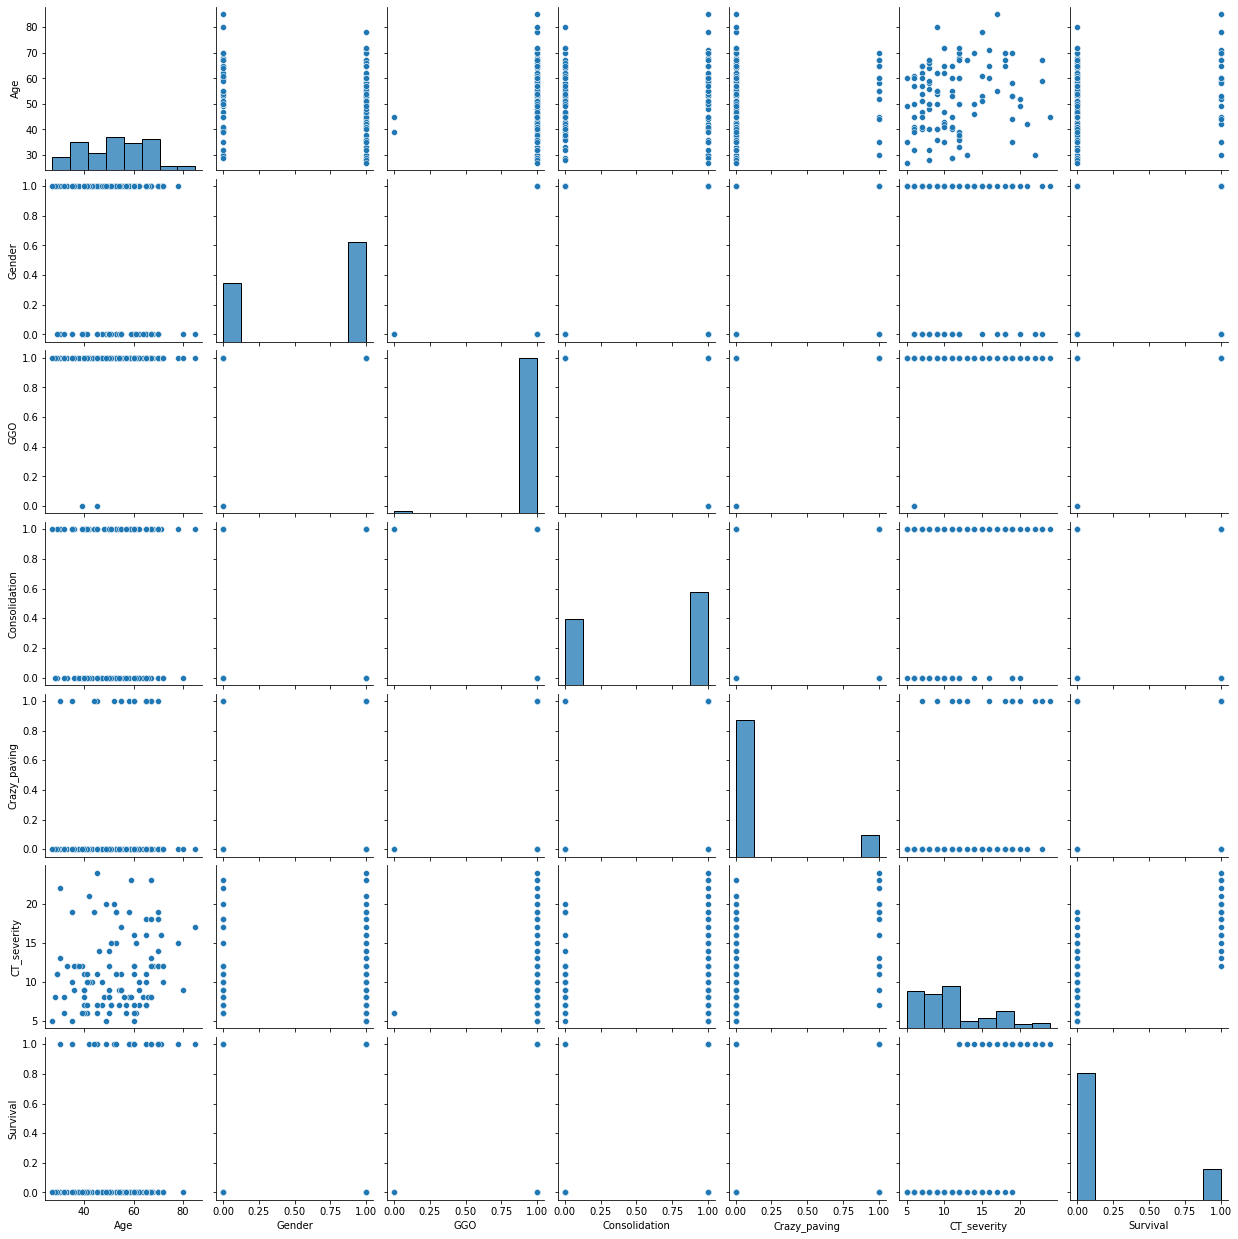

In [ ]:
#used to find the relationship between two variables
sns.pairplot(df)

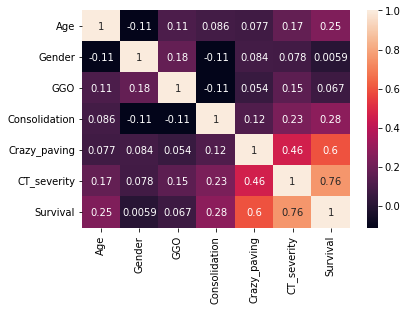

In [ ]:
#to find the collinearity of the data and help distinguish which rows or columns should or should not be included
#helps to filter any dependent variables that are collinear.
ax = sns.heatmap(df.corr(), annot=True)

In [ ]:
#defining the independent and dependent variables
x = df[["Age", "Gender", "GGO", "Consolidation", "Crazy_paving"]]
yr = df[["CT_severity"]]
yc = df[["Survival"]]

In [ ]:
#to perform standardization
#It transforms the data in such a manner that it has mean as 0 and standard deviation as 1. In short, it standardizes the data.
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [ ]:
#we split the data into train and test
xr_train, xr_test, yr_train, yr_test = train_test_split(x, yr, test_size=0.2, random_state=42)
xc_train, xc_test, yc_train, yc_test = train_test_split(x, yc, test_size=0.2, random_state=42)

USING LOGISTIC REGRESSION


In [ ]:
#defining the classifier
lr = LogisticRegression()
lr.fit(xc_train, yc_train)

LogisticRegression()

In [ ]:
#calculating the accuracy,precision,recall,F1 score and confusion matrix
accuracy = metrics.accuracy_score(yc_test, lr.predict(xc_test))
precision = metrics.precision_score(yc_test, lr.predict(xc_test), average='weighted')
recall = metrics.recall_score(yc_test, lr.predict(xc_test), average='weighted')
f1score = metrics.f1_score(yc_test, lr.predict(xc_test), average='weighted')
confusion_matrix = metrics.confusion_matrix(yc_test, lr.predict(xc_test))
classification = metrics.classification_report(yc_test, lr.predict(xc_test))
print("Accuracy: ", accuracy*100)
print("Precision: ", precision*100)
print("Recall: ", recall*100)
print("F1 Score: ", f1score*100)
print("Confusion_matrix: ")
print(confusion_matrix)
print("Classification Report:")
print(classification)

Accuracy:  91.30434782608695
Precision:  91.30434782608695
Recall:  91.30434782608695
F1 Score:  91.30434782608695
Confusion_matrix: 
[[18  1]
 [ 1  3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        19
           1       0.75      0.75      0.75         4

    accuracy                           0.91        23
   macro avg       0.85      0.85      0.85        23
weighted avg       0.91      0.91      0.91        23



USING KNN CLASSIFIER

Text(0, 0.5, 'Accuracy')

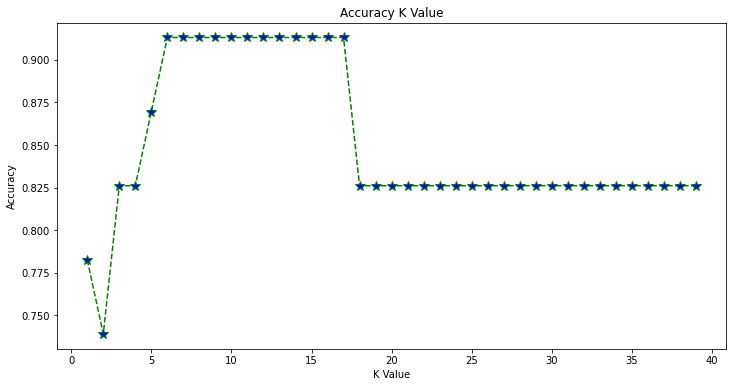

In [ ]:
#plotting the graph for k value vs accuracy
error = []
for i in range(1, 40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(xc_train, yc_train)
  pred_i = knn.predict(xc_test)
  error.append(metrics.accuracy_score(yc_test,pred_i))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='green', linestyle='dashed', marker='*',
markerfacecolor='blue', markersize=10)
plt.title('Accuracy K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [ ]:
#defining the knn classifier model
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(xc_train, yc_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
#calculating the accuracy,precision,recall,F1 score and confusion matrix
accuracy = metrics.accuracy_score(yc_test, knn.predict(xc_test))
precision = metrics.precision_score(yc_test, knn.predict(xc_test), average='weighted')
recall = metrics.recall_score(yc_test, knn.predict(xc_test), average='weighted')
f1score = metrics.f1_score(yc_test, knn.predict(xc_test), average='weighted')
confusion_matrix = metrics.confusion_matrix(yc_test, knn.predict(xc_test))
classification = metrics.classification_report(yc_test, knn.predict(xc_test))
print("Accuracy: ", accuracy*100)
print("Precision: ", precision*100)
print("Recall: ", recall*100)
print("F1 Score: ", f1score*100)
print("Confusion_matrix: ")
print(confusion_matrix)
print("Classification Report:")
print(classification)

Accuracy:  91.30434782608695
Precision:  91.30434782608695
Recall:  91.30434782608695
F1 Score:  91.30434782608695
Confusion_matrix: 
[[18  1]
 [ 1  3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        19
           1       0.75      0.75      0.75         4

    accuracy                           0.91        23
   macro avg       0.85      0.85      0.85        23
weighted avg       0.91      0.91      0.91        23



USING GAUSSIAN CLASSIFIER

In [ ]:
#defining the gaussian model
gnb = GaussianNB()
gnb.fit(xc_train, yc_train)

GaussianNB()

In [ ]:
#calculating the accuracy,precision,recall,F1 score and confusion matrix
accuracy = metrics.accuracy_score(yc_test, gnb.predict(xc_test))
precision = metrics.precision_score(yc_test, gnb.predict(xc_test), average='weighted')
recall = metrics.recall_score(yc_test, gnb.predict(xc_test), average='weighted')
f1score = metrics.f1_score(yc_test, gnb.predict(xc_test), average='weighted')
confusion_matrix = metrics.confusion_matrix(yc_test, gnb.predict(xc_test))
classification = metrics.classification_report(yc_test, gnb.predict(xc_test))
print("Accuracy: ", accuracy*100)
print("Precision: ", precision*100)
print("Recall: ", recall*100)
print("F1 Score: ", f1score*100)
print("Confusion_matrix: ")
print(confusion_matrix)
print("Classification Report:")
print(classification)

Accuracy:  17.391304347826086
Precision:  3.0245746691871456
Recall:  17.391304347826086
F1 Score:  5.152979066022545
Confusion_matrix: 
[[ 0 19]
 [ 0  4]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.17      1.00      0.30         4

    accuracy                           0.17        23
   macro avg       0.09      0.50      0.15        23
weighted avg       0.03      0.17      0.05        23



USING DECISION TREE CLASSIFIER

In [ ]:
#defining the decision tree classifier
dt = DecisionTreeClassifier()
dt.fit(xc_train, yc_train)

DecisionTreeClassifier()

In [ ]:
#calculating the accuracy,precision,recall,F1 score and confusion matrix
accuracy = metrics.accuracy_score(yc_test, dt.predict(xc_test))
precision = metrics.precision_score(yc_test, dt.predict(xc_test), average='weighted')
recall = metrics.recall_score(yc_test, dt.predict(xc_test), average='weighted')
f1score = metrics.f1_score(yc_test, dt.predict(xc_test), average='weighted')
confusion_matrix = metrics.confusion_matrix(yc_test, dt.predict(xc_test))
classification = metrics.classification_report(yc_test, dt.predict(xc_test))
print("Accuracy: ", accuracy*100)
print("Precision: ", precision*100)
print("Recall: ", recall*100)
print("F1 Score: ", f1score*100)
print("Confusion_matrix: ")
print(confusion_matrix)
print("Classification Report:")
print(classification)

Accuracy:  78.26086956521739
Precision:  80.38647342995169
Recall:  78.26086956521739
F1 Score:  79.17482700091398
Confusion_matrix: 
[[16  3]
 [ 2  2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.84      0.86        19
           1       0.40      0.50      0.44         4

    accuracy                           0.78        23
   macro avg       0.64      0.67      0.65        23
weighted avg       0.80      0.78      0.79        23



USING LINEAR SUPPORT VECTOR CLASSIFIER

In [ ]:
#defining the Linear support vector classifier
svm = SVC()
svm.fit(xc_train, yc_train)

SVC()

In [ ]:
#defining the decision tree classifier
accuracy = metrics.accuracy_score(yc_test, svm.predict(xc_test))
precision = metrics.precision_score(yc_test, svm.predict(xc_test), average='weighted')
recall = metrics.recall_score(yc_test, svm.predict(xc_test), average='weighted')
f1score = metrics.f1_score(yc_test, svm.predict(xc_test), average='weighted')
confusion_matrix = metrics.confusion_matrix(yc_test, svm.predict(xc_test))
classification = metrics.classification_report(yc_test, svm.predict(xc_test))
print("Accuracy: ", accuracy*100)
print("Precision: ", precision*100)
print("Recall: ", recall*100)
print("F1 Score: ", f1score*100)
print("Confusion_matrix: ")
print(confusion_matrix)
print("Classification Report:")
print(classification)

Accuracy:  91.30434782608695
Precision:  91.30434782608695
Recall:  91.30434782608695
F1 Score:  91.30434782608695
Confusion_matrix: 
[[18  1]
 [ 1  3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        19
           1       0.75      0.75      0.75         4

    accuracy                           0.91        23
   macro avg       0.85      0.85      0.85        23
weighted avg       0.91      0.91      0.91        23



CONCLUSION: So we can see that on using Logistic Regression, KNN classifier and Support Vector Classifier, the model gives the highest accuracy ie 91.304 whereas on using Gaussian NB classifier the model gives the lowest accuracy  ie 17.391